In [286]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import sklearn as skt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MultipleLocator

In [287]:
df = pd.read_csv("Datasets/accesos_biblioteca.csv")
df_c=df
df.head()

,Fecha,Día,Mes,Año,Semestre,Accesos,Vacaciones?
0,2023-12-14,14,12,2023,2,953,0
1,2023-12-15,15,12,2023,2,549,0
2,2023-12-16,16,12,2023,2,71,0
3,2023-12-17,17,12,2023,2,0,1
4,2023-12-18,18,12,2023,2,739,0


In [288]:
# max = ((df['Accesos'].max())//100)+2
# max = ((df['Accesos'].max())//500)+2
max = ((df['Accesos'].max())//1000)+2
print(max)

6


In [289]:
bins = [0]
labels = []
# for i in range(max):
#     bins.append(50+i*100)
#     labels.append(i)
# for i in range(max):
#     bins.append((i+1)*500)
#     labels.append(i+1)
for i in range(max):
    bins.append((i+1)*1000)
    labels.append(i+1)
df['Access'] = pd.cut(df['Accesos'], bins=bins, labels=labels, right=False)

print(df)

          Fecha  Día  Mes   Año  Semestre  Accesos  Vacaciones? Access
0    2023-12-14   14   12  2023         2      953            0      1
1    2023-12-15   15   12  2023         2      549            0      1
2    2023-12-16   16   12  2023         2       71            0      1
3    2023-12-17   17   12  2023         2        0            1      1
4    2023-12-18   18   12  2023         2      739            0      1
..          ...  ...  ...   ...       ...      ...          ...    ...
506  2025-05-03    3    5  2025         1        0            1      1
507  2025-05-04    4    5  2025         1        0            1      1
508  2025-05-05    5    5  2025         1     2750            0      3
509  2025-05-06    6    5  2025         1     1866            0      2
510  2025-05-07    7    5  2025         1     2254            0      3

[511 rows x 8 columns]


<Axes: >

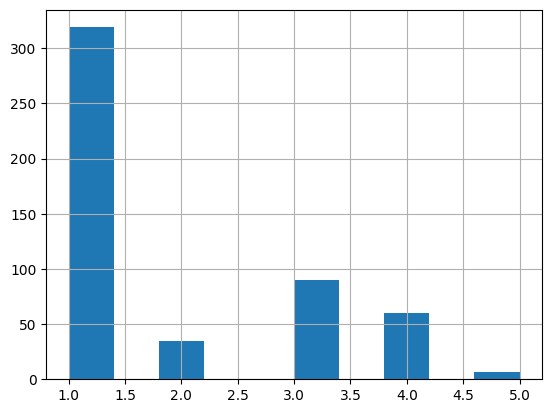

In [290]:
df['Access'].hist()

In [291]:
X= df.drop(['Accesos','Fecha', 'Access','Año', 'Semestre'], axis=1)
Y= df['Access']
X.head()
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# pca = PCA(n_components=0.80) 
# X = pca.fit_transform(X)

,Día,Mes,Vacaciones?
0,14,12,0
1,15,12,0
2,16,12,0
3,17,12,1
4,18,12,0


In [292]:
X_train, X_test, Y_train, Y_test = skt.model_selection.train_test_split(X, Y, test_size=0.25, random_state=42) #, stratify=Y
clf = RandomForestClassifier(n_estimators=100, max_depth=5,  max_features='sqrt', min_samples_leaf=2, class_weight='balanced')
#clf = RandomForestRegressor(n_estimators=100, max_depth=5,  max_features='sqrt', min_samples_leaf=2)
clf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


______________________________________________________________________________________________________________
Elapsed time to compute the importances: 0.010 seconds
______________________________________________________________________________________________________________


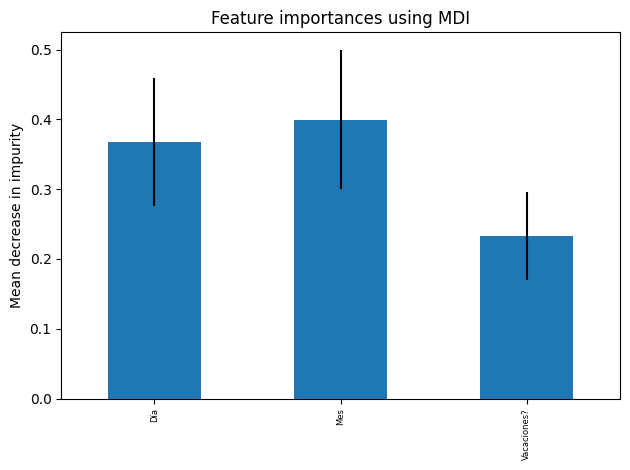

In [293]:
#-------------------------------------------------------------------------------
import time

start_time   = time.time()
importances  = clf.feature_importances_
std          = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(110*"_")
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
print(110*"_")

graph_df = df.drop(['Accesos','Fecha','Access','Año','Semestre'], axis=1)
forest_importances = pd.Series(importances, index=graph_df.columns)

# Graficamos -------------------------------------------------------------------
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.tick_params(axis='x', labelsize = 6)
fig.tight_layout()
#-------------------------------------------------------------------------------

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        78
           2       0.28      0.50      0.36        10
           3       0.52      0.70      0.59        23
           4       0.45      0.33      0.38        15
           5       0.50      1.00      0.67         2

    accuracy                           0.72       128
   macro avg       0.55      0.67      0.58       128
weighted avg       0.78      0.72      0.74       128

[[64  6  7  0  1]
 [ 0  5  2  3  0]
 [ 0  4 16  3  0]
 [ 0  3  6  5  1]
 [ 0  0  0  0  2]]


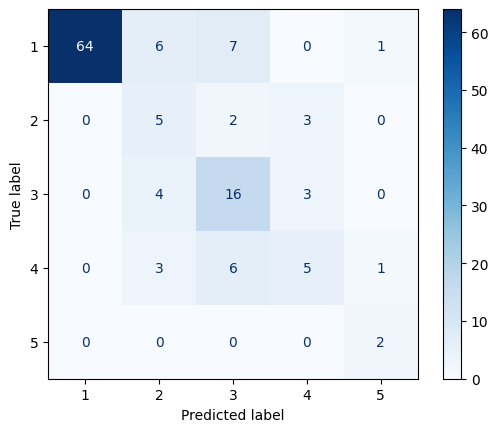

In [294]:
Y_pred = clf.predict(X_test)
f1_score(Y_test, Y_pred, average='macro')
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap=plt.cm.Blues)

In [295]:
# mae = mean_absolute_error(Y_test, Y_pred)
# mse = mean_squared_error(Y_test, Y_pred)
# rmse = root_mean_squared_error(Y_test, Y_pred)  # squared=False da la raíz cuadrada
# r2 = r2_score(Y_test, Y_pred)

# print(f"MAE: {mae}")
# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"R2: {r2}")

In [296]:
print(Y_pred)

[5 2 1 1 1 3 3 1 1 1 4 1 1 3 1 1 3 1 1 2 2 1 1 1 1 1 3 3 1 1 3 1 3 3 1 1 4
 1 1 5 3 5 1 1 4 3 4 1 1 3 1 2 3 1 4 1 1 4 4 4 3 3 1 2 1 1 2 1 2 1 1 2 4 1
 3 3 1 1 3 3 1 1 3 1 1 1 1 3 3 3 2 2 4 1 1 2 3 1 4 5 2 3 1 2 1 2 1 1 1 3 2
 2 1 3 3 1 1 2 1 3 3 1 1 2 1 1 1 3]


In [297]:
print(Y_test)

124    5
84     3
433    1
255    1
68     1
      ..
329    3
442    1
56     1
245    1
501    3
Name: Access, Length: 128, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]
